In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cobra
import numpy as np
import seaborn as sns
import itertools
from matplotlib.colors import LogNorm, Normalize


In [2]:
import os
dpath = os.path.join('KBASE', 'phenotype_simulations')
os.listdir(dpath)

['HOT1A3_2OrMore_gapfill.model_initial_phenotype.xls',
 'HOT1A3_2OrMore_gapfill_initial_phenotype.xls',
 'HOT1A3_5OrMore_gapfill.model_initial_phenotype.xls',
 'HOT1A3_6OrMore_gapfill.model_initial_phenotype.xls',
 'HOT1A3_carveme_annotations_gapfill.model_initial_phenotype.xls',
 'HOT1A3_Genbank_annotations_parsed_by_Pathway_Tools_gapfill.model_initial_phenotype.xls',
 'HOT1A3_Majority_gapfill.model_initial_phenotype.xls',
 'HOT1A3_NCBI_EC_numbers_gapfill.model_initial_phenotype.xls',
 'HOT1A3_ProkkaAnnotation_gapfill.model_initial_phenotype.xls',
 'HOT1A3_RAST_annotation_gapfill.model_initial_phenotype.xls',
 'HOT1A3_Union_gapfill.model_initial_phenotype.xls']

In [3]:
def _read_phen_sim(fname):
    name = fname.split('.')[0].replace('_gapfill', '').replace('HOT1A3_','')
    df = pd.read_excel(os.path.join(dpath, fname))
    df['model'] = name
    df['fname'] = fname
    
    return df

phen_df = pd.concat([_read_phen_sim(fname) for fname in os.listdir(dpath)])
phen_df

,Growth condition,Gene KO,Media WS,Addtional compounds,Addtl compound bounds,Custom reaction bounds,Observed normal growth,Simulated growth,Simulated growth fraction,Gapfilled reaction count,Gapfilled reactions,Prediction class,model,fname
0,PROMM_glycerol_media,none,osnat_weissberg:narrative_1685348220740,none,NaN,NaN,1,0.00000,0,0,NaN,FN,2OrMore,HOT1A3_2OrMore_gapfill.model_initial_phenotype...
1,PROMM_lactate_media,none,osnat_weissberg:narrative_1685348220740,none,NaN,NaN,1,0.00000,0,0,NaN,FN,2OrMore,HOT1A3_2OrMore_gapfill.model_initial_phenotype...
2,PROMM_acetate_media,none,osnat_weissberg:narrative_1685348220740,none,NaN,NaN,1,0.00000,0,0,NaN,FN,2OrMore,HOT1A3_2OrMore_gapfill.model_initial_phenotype...
3,PROMM_pyruvate_media,none,osnat_weissberg:narrative_1685348220740,none,NaN,NaN,1,3.29214,1,0,NaN,CP,2OrMore,HOT1A3_2OrMore_gapfill.model_initial_phenotype...
4,PROMM_media,none,osnat_weissberg:narrative_1685348220740,none,NaN,NaN,1,3.29214,1,0,NaN,CP,2OrMore,HOT1A3_2OrMore_gapfill.model_initial_phenotype...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,HMBamisug_media,none,osnat_weissberg:narrative_1685348220740,none,NaN,NaN,1,0.00000,0,0,NaN,FN,Union,HOT1A3_Union_gapfill.model_initial_phenotype.xls
9,HMBoligo_media,none,osnat_weissberg:narrative_1685348220740,none,NaN,NaN,1,0.00000,0,0,NaN,FN,Union,HOT1A3_Union_gapfill.model_initial_phenotype.xls
10,MMB_neg_media,none,osnat_weissberg:narrative_1685348220740,none,NaN,NaN,0,0.00000,0,0,NaN,CN,Union,HOT1A3_Union_gapfill.model_initial_phenotype.xls
11,MMB_pyruvate_media,none,osnat_weissberg:narrative_1685348220740,none,NaN,NaN,1,5.82175,1,0,NaN,CP,Union,HOT1A3_Union_gapfill.model_initial_phenotype.xls


In [4]:
phen_df['model'] = phen_df['model'].map({
    '2OrMore_initial_phenotype' : '2OrMore_initial_phenotype',
    '2OrMore' :'2_OrMore', 
    '3OrMore' :'3_OrMore', 
    '4OrMore' :'4_OrMore', 
    '5OrMore' :'5_OrMore', 
    '6OrMore' :'6_OrMore', 
    'BlastKOALA_KEGG' : 'KEGG', 
    'carveme_annotations' : 'carveme', 
    'DRAM' : 'DRAM',
    'Genbank_annotations_parsed_by_Pathway_Tools' : 'BioCYC', 
    'Majority' : 'Majority',
    'NCBI_EC_numbers' : 'NCBI_EC' ,
    'ProkkaAnnotation' : 'Prokka',
    'RAST_annotation' : 'RASTtk', 
    'Union': '1_OrMore',
})


In [5]:
phen_df.loc[phen_df.model.isna()]

,Growth condition,Gene KO,Media WS,Addtional compounds,Addtl compound bounds,Custom reaction bounds,Observed normal growth,Simulated growth,Simulated growth fraction,Gapfilled reaction count,Gapfilled reactions,Prediction class,model,fname


In [6]:
morder = [
    'BioCYC', 'DRAM', 'KEGG', 'carveme', 'NCBI_EC', 'Prokka', 'RASTtk', 'Majority',
    '1_OrMore', '2_OrMore', '3_OrMore', '4_OrMore','5_OrMore', '6_OrMore',
]


In [7]:
df = pd.read_csv('kbase_reaction_per_model.csv')

In [8]:
import os
modelseed_dpath = os.path.join('..', '..', 'ModelSEEDDatabase', 'Biochemistry',  'Pathways')
os.listdir(modelseed_dpath)

['HopeScenarios.txt',
 'KEGG.pathways',
 'ModelSEED_Subsystems.tsv',
 'plantdefault.pathways.tsv']

In [9]:
modelseed_pathway_df = pd.read_csv(os.path.join(modelseed_dpath, 'ModelSEED_Subsystems.tsv',), sep='\t')

In [10]:
modelseed_pathway_df

,Class,Sub-class,Name,Role,Reaction
0,-,-,CBSS-155864.1.peg.3753,Glutamate synthase [NADPH] small chain (EC 1.4...,rxn00085
1,-,-,COG0523,Carbonic anhydrase (EC 4.2.1.1),rxn00102
2,-,-,COG0523,Dihydroorotase (EC 3.5.2.3),rxn01465
3,-,-,COG0523,GTP cyclohydrolase I (EC 3.5.4.16) type 1,rxn00299
4,-,-,COG0523,GTP cyclohydrolase I (EC 3.5.4.16) type 1,rxn00302
...,...,...,...,...,...
9815,Virulence,Resistance to antibiotics and toxic compounds,Resistance_to_fluoroquinolones,DNA gyrase subunit B (EC 5.99.1.3),rxn13783
9816,Virulence,Resistance to antibiotics and toxic compounds,Resistance_to_fluoroquinolones,Topoisomerase IV subunit A (EC 5.99.1.-),rxn13783
9817,Virulence,Resistance to antibiotics and toxic compounds,Resistance_to_fluoroquinolones,Topoisomerase IV subunit B (EC 5.99.1.-),rxn13783
9818,Virulence,"Type III, Type IV, Type VI, ESAT secretion sys...",Type_IV_pilus,3-dehydroquinate synthase (EC 4.2.3.4),rxn02212


In [11]:
df.id.str.rsplit('_', n=1, expand=True)

,0,1
0,EX_cpd02701,b
1,EX_cpd11416,b
2,EX_cpd00001,b
3,EX_cpd00254,b
4,EX_cpd10516,b
...,...,...
18995,rxn02810,c0
18996,EX_cpd00063,e0
18997,EX_cpd00205,e0
18998,EX_cpd10515,e0


In [12]:
df['Reaction'] = df.id.str.rsplit('_', n=1, expand=True)[0]

In [13]:
df.head()

,Unnamed: 0,id,name,model,status,hasgpr,exchange,gapfilled,gpr_nogap,gpr_gapfill,Reaction
0,0,EX_cpd02701_b,EX_cpd02701_b,KEGG,exchange,False,True,False,NaN,NaN,EX_cpd02701
1,1,EX_cpd11416_b,EX_cpd11416_b,KEGG,exchange,False,True,False,NaN,NaN,EX_cpd11416
2,2,EX_cpd00001_b,EX_cpd00001_b,KEGG,exchange,False,True,False,NaN,NaN,EX_cpd00001
3,3,EX_cpd00254_b,EX_cpd00254_b,KEGG,exchange,False,True,False,NaN,NaN,EX_cpd00254
4,4,EX_cpd10516_b,EX_cpd10516_b,KEGG,exchange,False,True,False,NaN,NaN,EX_cpd10516


In [14]:
modelseed_pathway_in_model_df = modelseed_pathway_df.loc[modelseed_pathway_df.Reaction.isin(df.Reaction)]

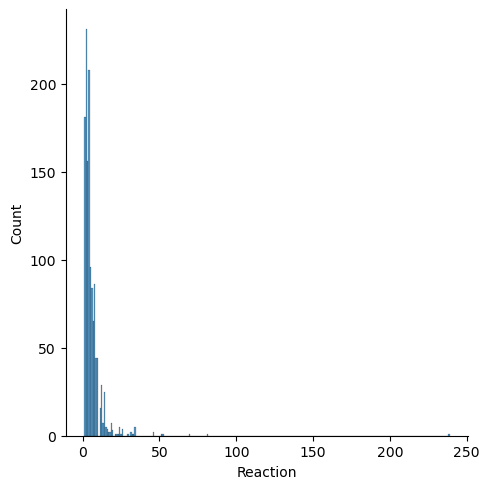

In [15]:
sns.displot(modelseed_pathway_in_model_df.Reaction.value_counts())
plt.show()

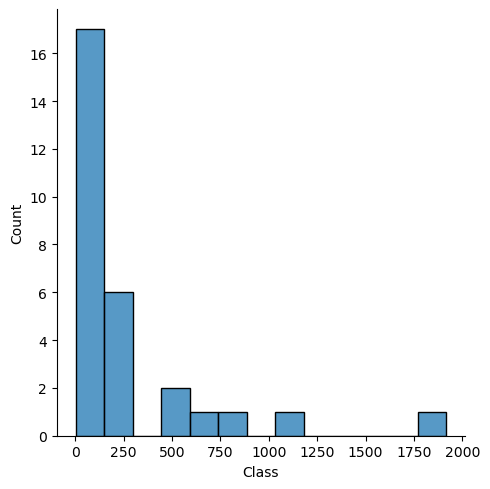

In [16]:
sns.displot(modelseed_pathway_in_model_df.Class.value_counts())
plt.show()

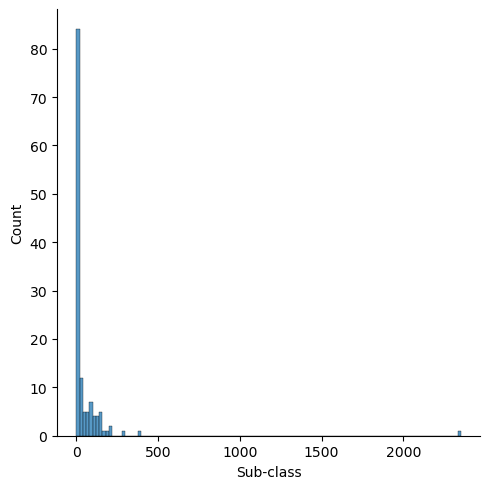

In [17]:
sns.displot(modelseed_pathway_in_model_df['Sub-class'].value_counts())
plt.show()

In [18]:
modelseed_pathway_in_model_df[['Class', 'Sub-class']].value_counts().reset_index().head(30)



,Class,Sub-class,0
0,Experimental Subsystems,-,1579
1,Carbohydrates,Central carbohydrate metabolism,383
2,Amino Acids and Derivatives,Branched-chain amino acids,288
3,"Fatty Acids, Lipids, and Isoprenoids",Fatty acids,215
4,"Cofactors, Vitamins, Prosthetic Groups, Pigments",Folate and pterines,215
5,"Fatty Acids, Lipids, and Isoprenoids",Phospholipids,181
6,Experimental Subsystems,Plant-Prokaryote DOE project,172
7,Clustering-based subsystems,-,172
8,Clustering-based subsystems,Fatty acid metabolic cluster,154
9,Amino Acids and Derivatives,Aromatic amino acids and derivatives,148


In [19]:
modelseed_pathway_in_model_df['Class'].value_counts()# .reset_index()['index'].to_list()



Experimental Subsystems                             1917
Carbohydrates                                       1108
Amino Acids and Derivatives                          826
Fatty Acids, Lipids, and Isoprenoids                 638
Clustering-based subsystems                          554
Cofactors, Vitamins, Prosthetic Groups, Pigments     474
Respiration                                          258
Nucleosides and Nucleotides                          252
Protein Metabolism                                   234
Cell Wall and Capsule                                231
Membrane Transport                                   217
Stress Response                                      195
Metabolism of Aromatic Compounds                      92
Virulence                                             78
Regulation and Cell signaling                         66
RNA Metabolism                                        63
Nitrogen Metabolism                                   56
Sulfur Metabolism              

In [20]:
modelseed_pathway_in_model_df.loc[modelseed_pathway_in_model_df.Class.isin(['Clustering-based subsystems']), 'Sub-class'].value_counts()

-                                                                                                          172
Fatty acid metabolic cluster                                                                               154
Hypothetical lipase related to Phosphatidate metabolism                                                     26
relates permeases with chi component of DNA pol and Val tRNA syn                                            20
Clustering-based subsystems                                                                                 19
contains Thr-tRNA-syn, pyridoxine biosyn, lipid A biosyn, 3 hypos                                           16
Related to N-acetylglucosamine utilization subsystem?                                                       14
Mycocerosic acid and related Polyketides biosynthesis clusters                                              13
Two related proteases                                                                                       13
C

In [21]:
reaction_classes = [
 'Carbohydrates',
 'Amino Acids and Derivatives',
 'Fatty Acids, Lipids, and Isoprenoids',
 #'Clustering-based subsystems',
 'Cofactors, Vitamins, Prosthetic Groups, Pigments',
 'Nucleosides and Nucleotides',
 'Cell Wall and Capsule',
 'Protein Metabolism',
 'Membrane Transport',
 'Respiration',
 'Stress Response',
 'Metabolism of Aromatic Compounds',
 'Virulence',
 'Regulation and Cell signaling',
 'RNA Metabolism',
 'Nitrogen Metabolism',
 'Sulfur Metabolism',
 'Phosphorus Metabolism',
 'Miscellaneous',
 'DNA Metabolism',
 'Motility and Chemotaxis',
 'Secondary Metabolism',
]

In [22]:
classes_for_merge = modelseed_pathway_in_model_df.loc[modelseed_pathway_in_model_df['Class'].isin(reaction_classes), ['Class', 'Reaction']].drop_duplicates()

In [23]:
classes_for_merge

,Class,Reaction
40,Amino Acids and Derivatives,rxn00717
41,Amino Acids and Derivatives,rxn01025
44,Amino Acids and Derivatives,rxn00283
47,Amino Acids and Derivatives,rxn00806
48,Amino Acids and Derivatives,rxn00903
...,...,...
9789,Virulence,rxn10481
9803,Virulence,rxn02011
9804,Virulence,rxn08040
9818,Virulence,rxn02212


In [24]:
classes_for_merge['foo'] = 1
pdf = classes_for_merge.pivot_table(columns='Class', index='Reaction', aggfunc='count', fill_value=0, values='foo')
pdf['All'] = pdf.sum(axis=1)
pdf.loc[pdf.All > 4, ].sum().nlargest(n=10)

Class
All                                                 114
Amino Acids and Derivatives                          21
Fatty Acids, Lipids, and Isoprenoids                 20
Metabolism of Aromatic Compounds                     20
Carbohydrates                                        18
Cofactors, Vitamins, Prosthetic Groups, Pigments     11
Miscellaneous                                        11
Virulence                                             4
Protein Metabolism                                    3
RNA Metabolism                                        3
dtype: int64

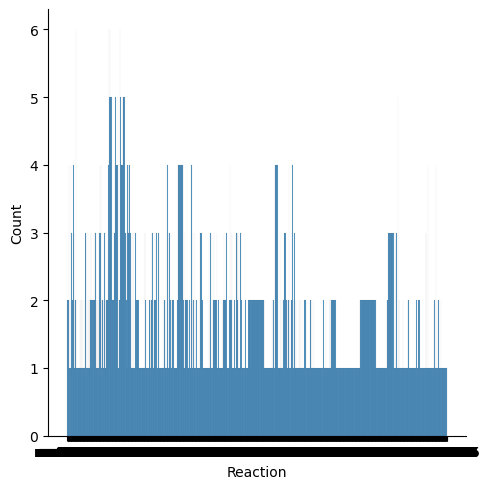

In [25]:
sns.displot(data=classes_for_merge, x='Reaction')
plt.show()

In [26]:
df

,Unnamed: 0,id,name,model,status,hasgpr,exchange,gapfilled,gpr_nogap,gpr_gapfill,Reaction
0,0,EX_cpd02701_b,EX_cpd02701_b,KEGG,exchange,False,True,False,NaN,NaN,EX_cpd02701
1,1,EX_cpd11416_b,EX_cpd11416_b,KEGG,exchange,False,True,False,NaN,NaN,EX_cpd11416
2,2,EX_cpd00001_b,EX_cpd00001_b,KEGG,exchange,False,True,False,NaN,NaN,EX_cpd00001
3,3,EX_cpd00254_b,EX_cpd00254_b,KEGG,exchange,False,True,False,NaN,NaN,EX_cpd00254
4,4,EX_cpd10516_b,EX_cpd10516_b,KEGG,exchange,False,True,False,NaN,NaN,EX_cpd10516
...,...,...,...,...,...,...,...,...,...,...,...
18995,18995,rxn02810_c0,E_Glutaconate_CoA_transferase_c0,1_OrMore,gapfill,NaN,False,True,NaN,Unknown,rxn02810
18996,18996,EX_cpd00063_e0,EX_Ca2_plus__e0,1_OrMore,gapfill,NaN,False,True,NaN,NaN,EX_cpd00063
18997,18997,EX_cpd00205_e0,EX_K_plus__e0,1_OrMore,gapfill,NaN,False,True,NaN,NaN,EX_cpd00205
18998,18998,EX_cpd10515_e0,EX_Fe2_plus__e0,1_OrMore,gapfill,NaN,False,True,NaN,NaN,EX_cpd10515


In [27]:
class_df = pd.merge(df, classes_for_merge, on='Reaction', how='left')

In [28]:
class_df.tail()

,Unnamed: 0,id,name,model,status,hasgpr,exchange,gapfilled,gpr_nogap,gpr_gapfill,Reaction,Class,foo
25671,18995,rxn02810_c0,E_Glutaconate_CoA_transferase_c0,1_OrMore,gapfill,NaN,False,True,NaN,Unknown,rxn02810,NaN,NaN
25672,18996,EX_cpd00063_e0,EX_Ca2_plus__e0,1_OrMore,gapfill,NaN,False,True,NaN,NaN,EX_cpd00063,NaN,NaN
25673,18997,EX_cpd00205_e0,EX_K_plus__e0,1_OrMore,gapfill,NaN,False,True,NaN,NaN,EX_cpd00205,NaN,NaN
25674,18998,EX_cpd10515_e0,EX_Fe2_plus__e0,1_OrMore,gapfill,NaN,False,True,NaN,NaN,EX_cpd10515,NaN,NaN
25675,18999,EX_cpd00020_e0,EX_Pyruvate_e0,1_OrMore,gapfill,NaN,False,True,NaN,NaN,EX_cpd00020,NaN,NaN


In [29]:
tot_class_pdf = class_df.pivot_table(index=['model', 'Class'], columns='status', values='Reaction', aggfunc='count', fill_value=0).reset_index()


In [30]:
tot_class_pdf['Genes Annot.'] = tot_class_pdf.hasgpr
tot_class_pdf['No Genes'] = tot_class_pdf.hasgpr + tot_class_pdf.nogpr
tot_class_pdf['Gapfill Rxn'] = tot_class_pdf.hasgpr + tot_class_pdf.nogpr + tot_class_pdf['gapfill']


In [31]:
sns.color_palette(n_colors=3)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)]

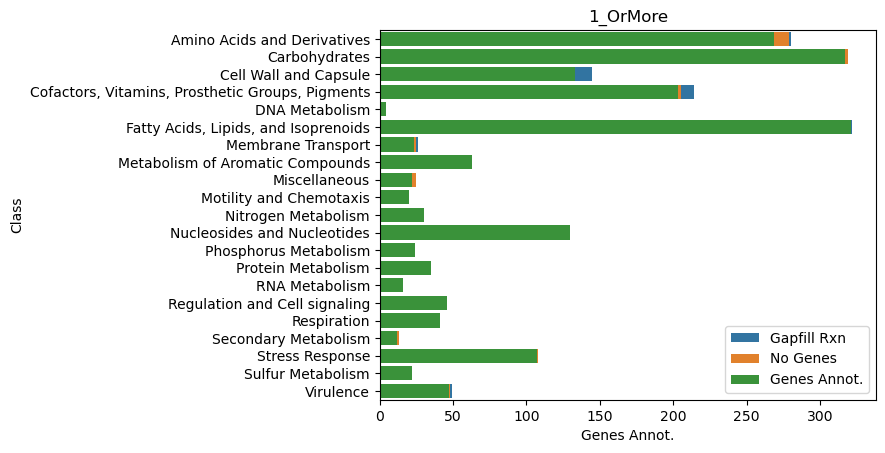

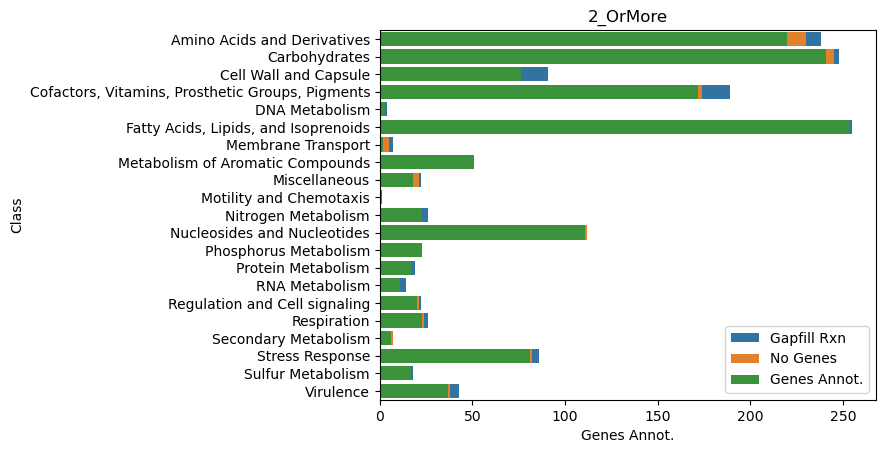

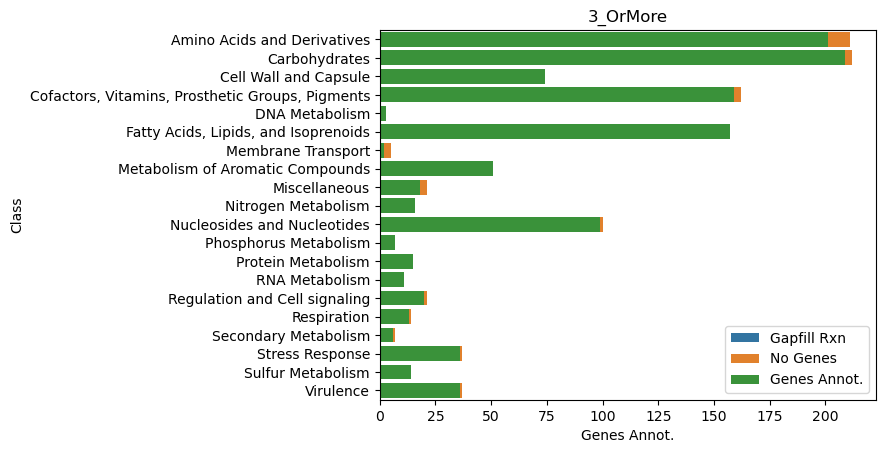

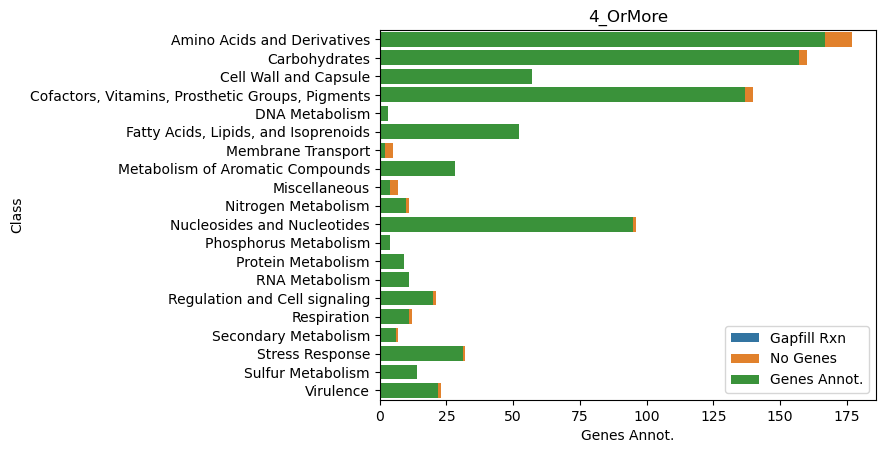

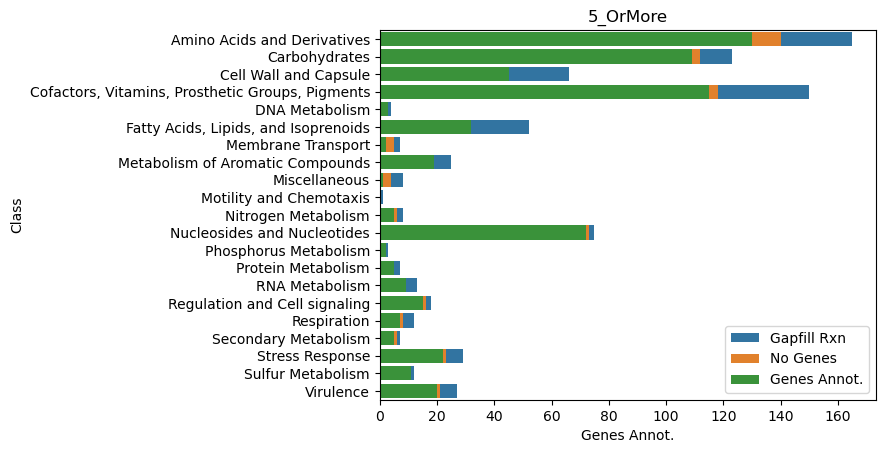

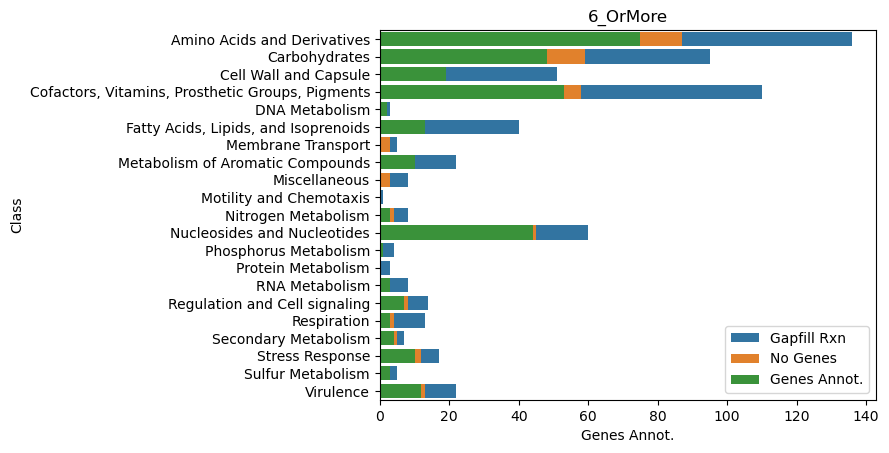

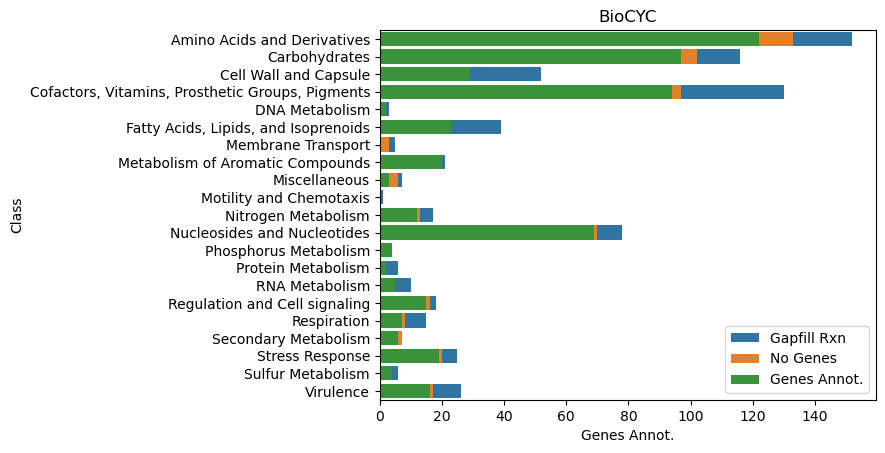

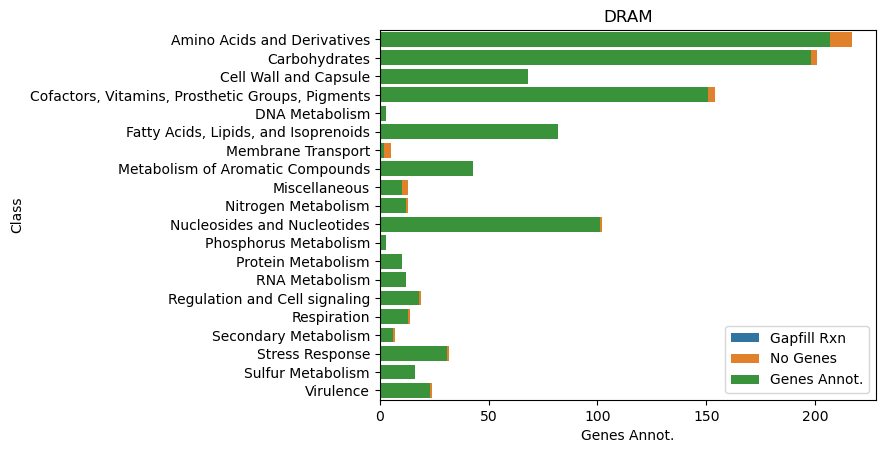

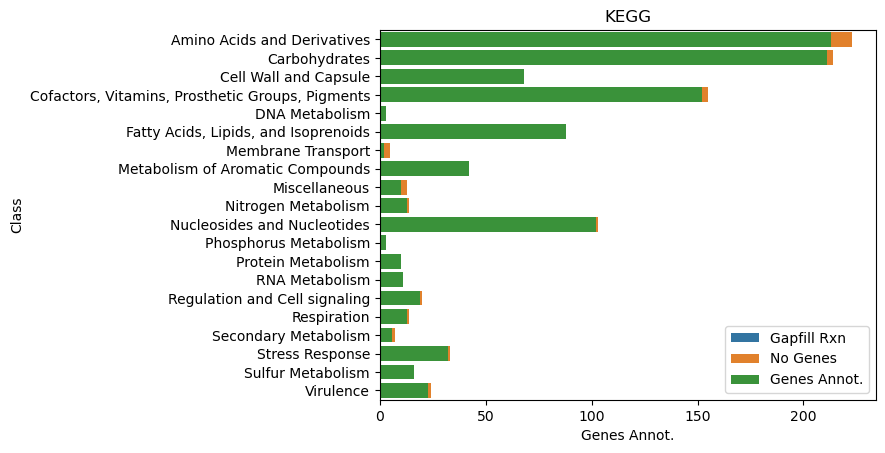

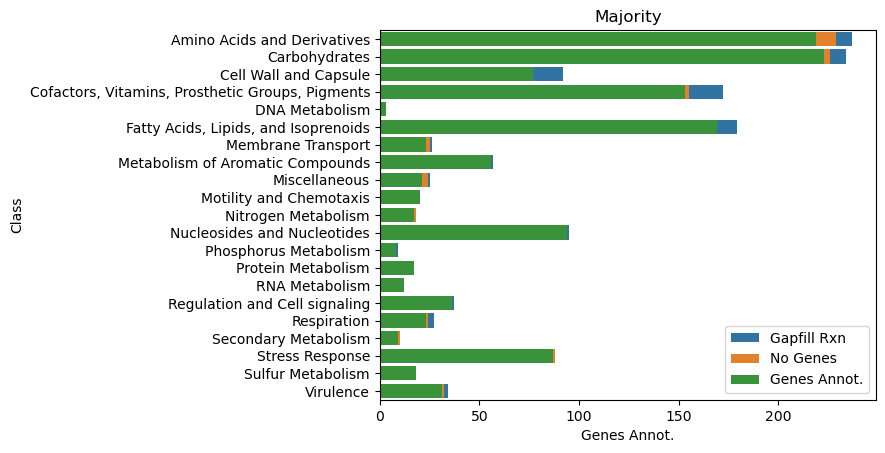

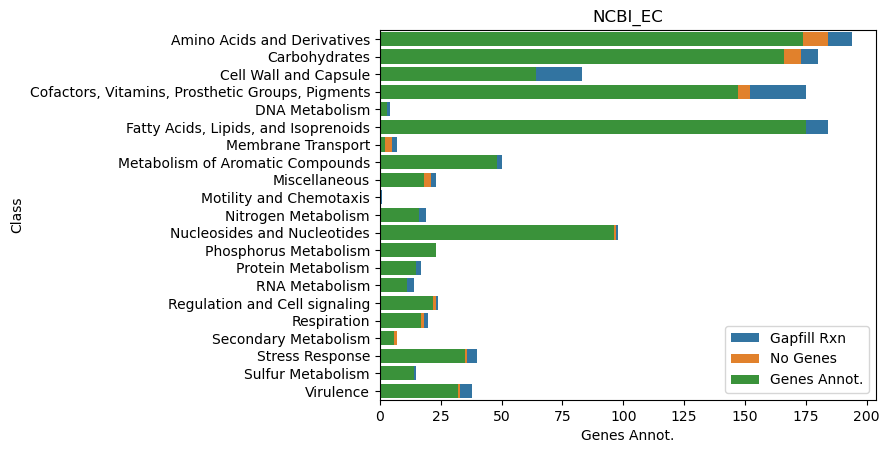

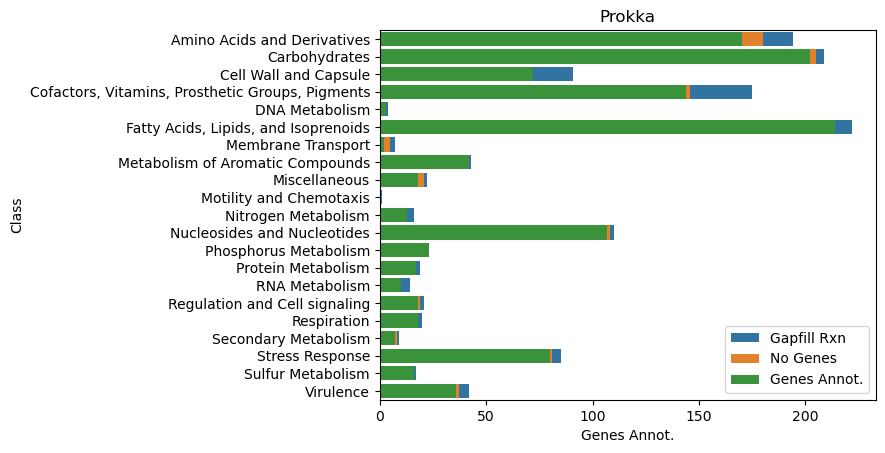

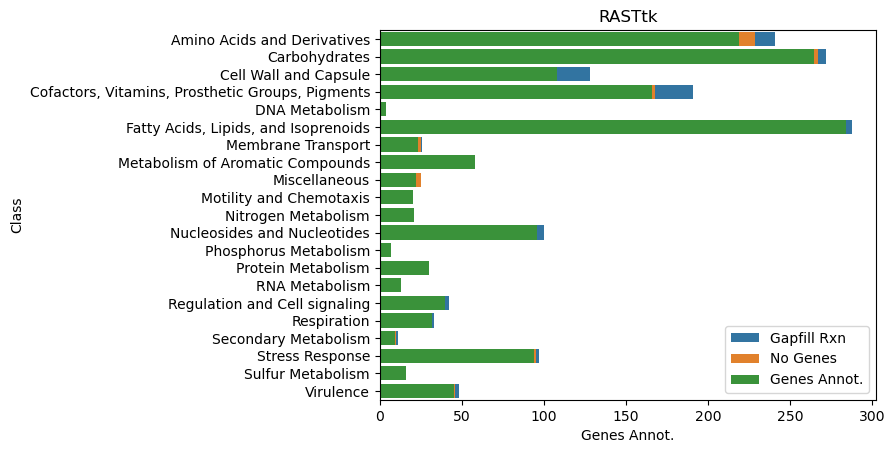

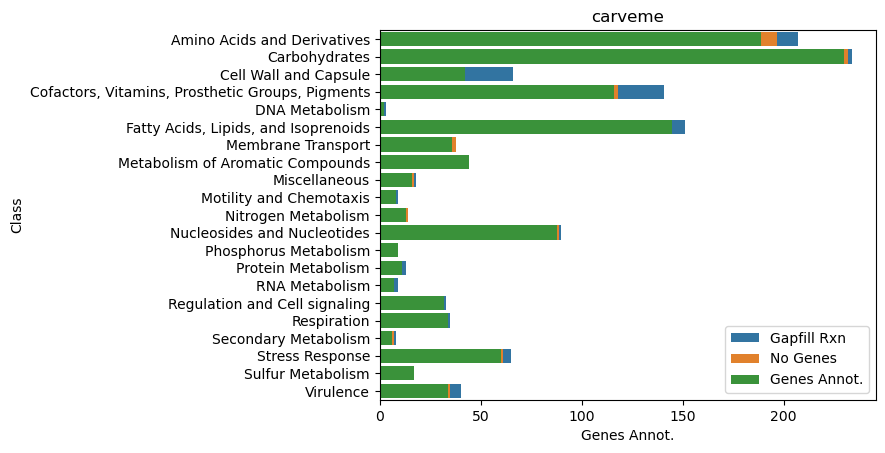

In [32]:
tot_class_pdf
for m in tot_class_pdf.model.unique():
    for l,c in zip(['Gapfill Rxn', 'No Genes', 'Genes Annot.'], sns.color_palette(n_colors=3)):
        sns.barplot(data=tot_class_pdf.loc[tot_class_pdf.model.isin([m])], 
                    y='Class', x=l, color=c, label=l)
    plt.legend()
    plt.title(m)
    plt.show()
    

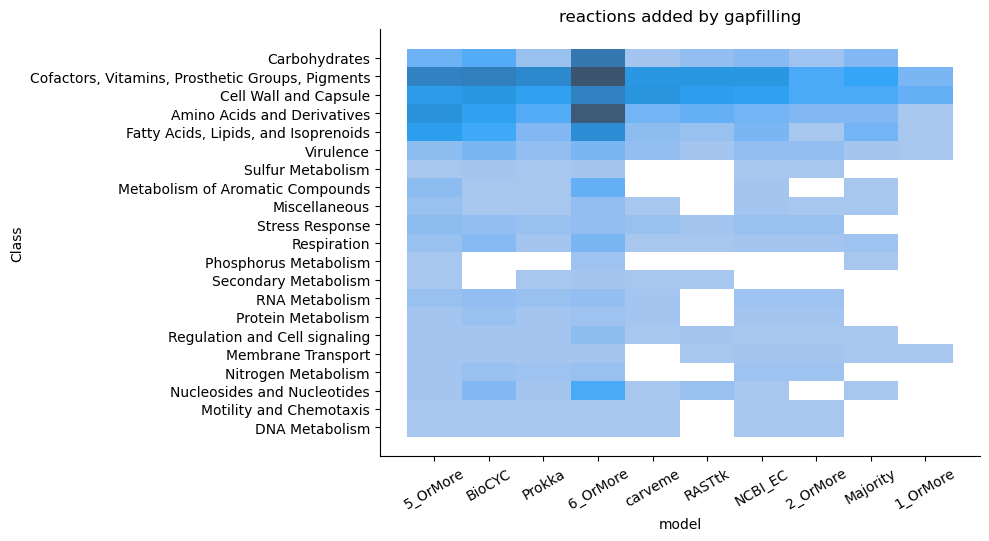

In [33]:
#sns.set_context('paper')
sns.displot(
    data=class_df.loc[class_df.status.isin(['gapfill'])], 
    x='model', y='Class', kind='hist', aspect=2, legend=True, col_order=morder)
plt.xticks(rotation=30)
plt.title('reactions added by gapfilling')
plt.show()

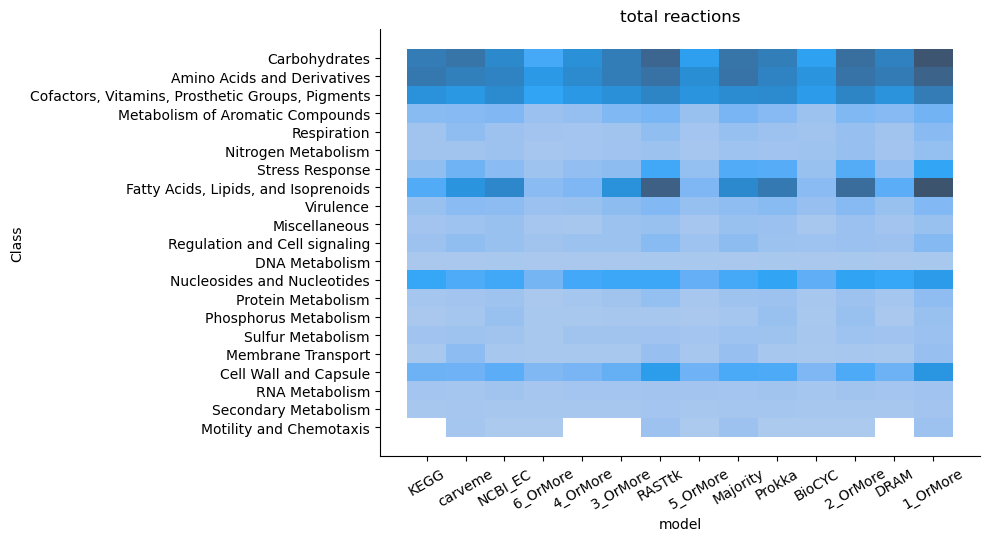

In [34]:
sns.displot(data=class_df.loc[~class_df.Class.isna()], x='model', y='Class', kind='hist', aspect=2, col_order=morder)
plt.xticks(rotation=30)
plt.title('total reactions')
plt.show()

In [35]:
class_df.status.value_counts()

hasgpr              21321
nogpr                1823
gapfill              1560
exchange              897
exchange_gapfill       75
Name: status, dtype: int64

In [36]:
class_df.status.unique()

array(['exchange', 'hasgpr', 'nogpr', 'exchange_gapfill', 'gapfill'],
      dtype=object)

In [37]:
status_map = {'exchange' :3, 'hasgpr' : 5, 'nogpr' : 4, 'exchange_gapfill' : 2, 'gapfill': 1}
df['status_int'] = df.status.map(status_map)
pdf = df.pivot_table(index='Reaction', columns='model', values='status_int', fill_value=0)

In [38]:
status_map = {'exchange' :3, 'hasgpr' : 5, 'nogpr' : 4, 'exchange_gapfill' : 2, 'gapfill': 1}
status_map = {'hasgpr' : 3, 'nogpr' : 2, 'gapfill': 1}
status_map = {'hasgpr' : 3, 'nogpr' : 3, 'gapfill': 1}
class_df['status_int'] = class_df.status.map(status_map)
pdf = class_df.dropna(subset='Class').pivot_table(index='Reaction', columns='model', values='status_int', fill_value=-10)

In [39]:
pdf = pdf[morder]

In [40]:
class_df.Class.value_counts()

Amino Acids and Derivatives                         2872
Carbohydrates                                       2817
Cofactors, Vitamins, Prosthetic Groups, Pigments    2258
Fatty Acids, Lipids, and Isoprenoids                2111
Nucleosides and Nucleotides                         1349
Cell Wall and Capsule                               1132
Stress Response                                      774
Metabolism of Aromatic Compounds                     598
Virulence                                            477
Regulation and Cell signaling                        356
Respiration                                          296
Miscellaneous                                        237
Nitrogen Metabolism                                  231
Protein Metabolism                                   210
Sulfur Metabolism                                    206
Membrane Transport                                   174
RNA Metabolism                                       168
Phosphorus Metabolism          

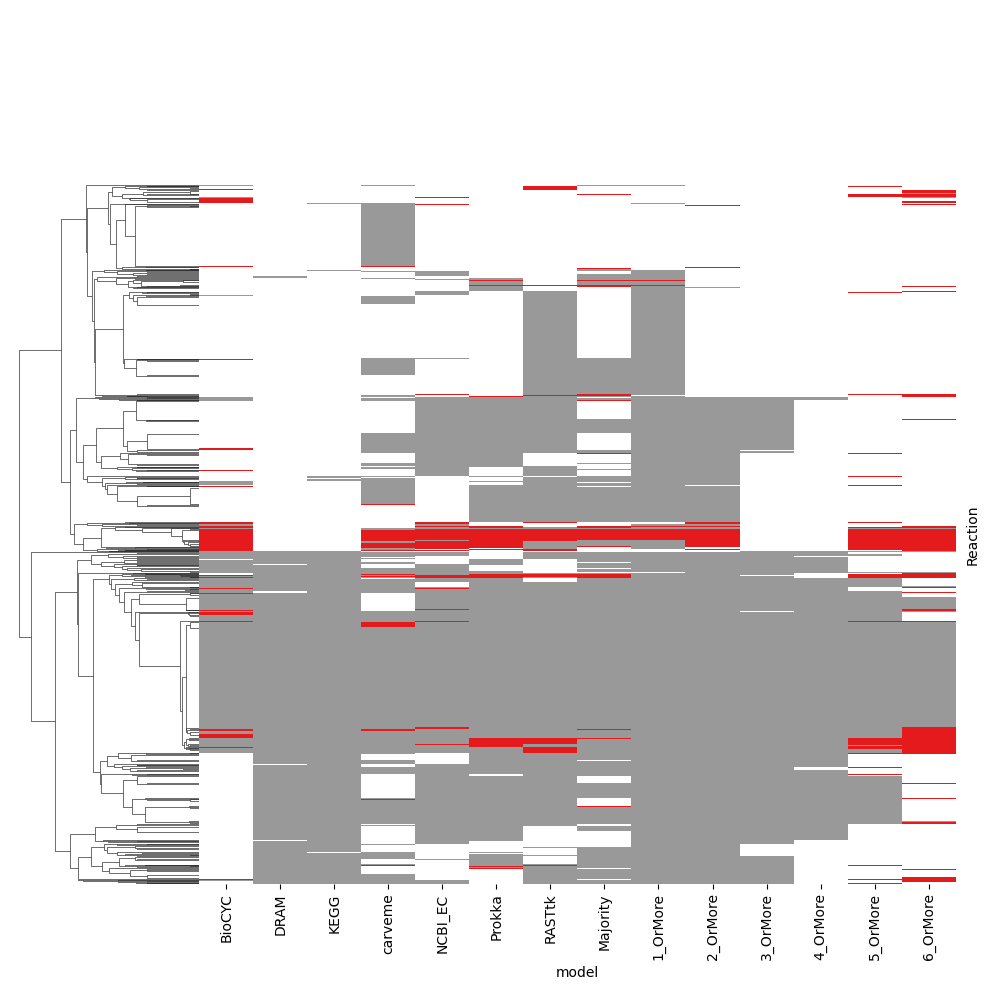

In [41]:

#lut = dict(zip(class_df.Class.unique(), "rbg"))
#samples = np.repeat(list(string.ascii_letters[0:8]),20)[:150]
#sample_cols = dict(zip(set(samples), sns.color_palette("cubehelix", 8)))

# row_colors = pd.DataFrame({'species':species.map(lut),
#                           'sample':[sample_cols[i] for i in samples]})
# g = sns.clustermap(iris, row_colors=row_colors,row_cluster=False)

sns.clustermap(pdf, cmap='Set1', mask=(pdf == -10), yticklabels=False,col_cluster=False, cbar_pos=None )


plt.show()

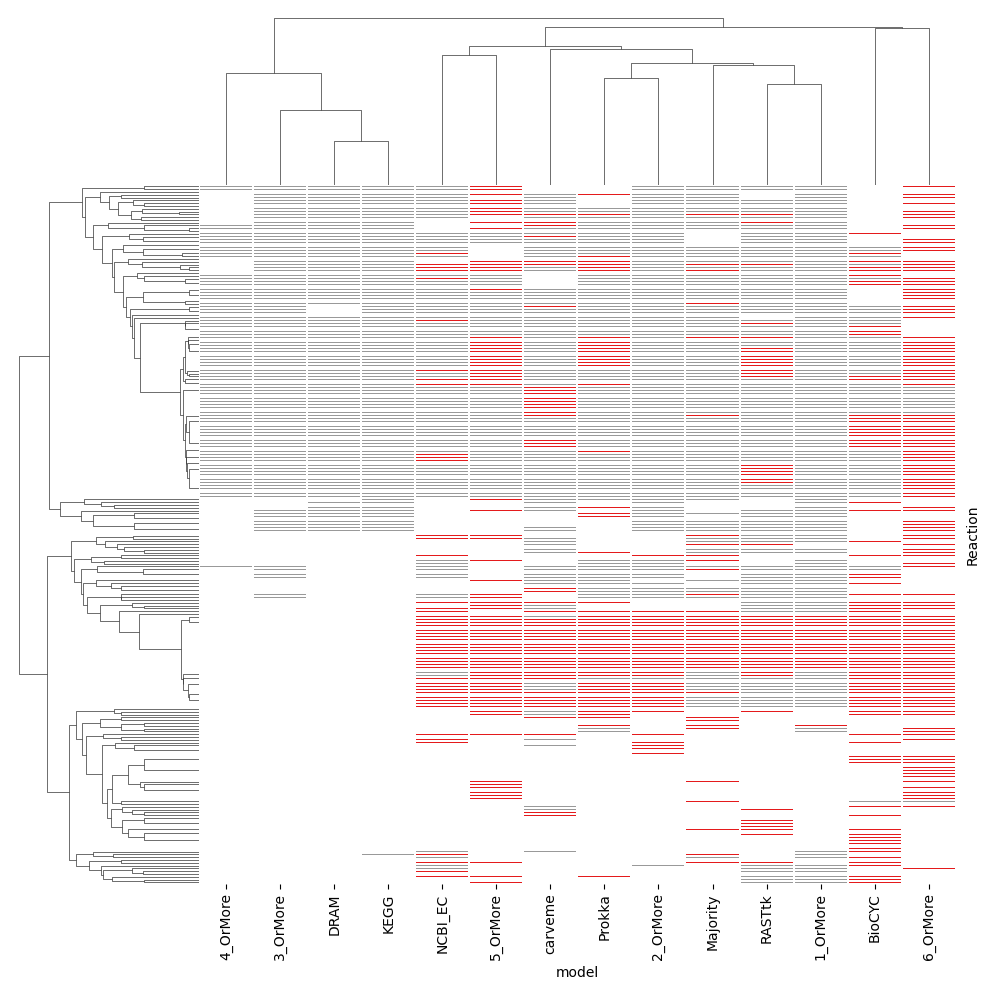

In [42]:
pdf_gap = pdf[pdf.isin([1]).any(axis=1)]        
sns.clustermap(pdf_gap, cmap='Set1', mask=(pdf_gap == -10), yticklabels=False,#col_cluster=False, 
               cbar_pos=None, lw=0.1 )
plt.show()

In [43]:
df.loc[df.Reaction == 'EX_cpd00001']

,Unnamed: 0,id,name,model,status,hasgpr,exchange,gapfilled,gpr_nogap,gpr_gapfill,Reaction,status_int
2,2,EX_cpd00001_b,EX_cpd00001_b,KEGG,exchange,False,True,False,NaN,NaN,EX_cpd00001,3
1100,1100,EX_cpd00001_e0,EX_H2O_e0,KEGG,nogpr,False,False,False,NaN,NaN,EX_cpd00001,4
1172,1172,EX_cpd00001_b,EX_cpd00001_b,carveme,exchange,False,True,False,NaN,NaN,EX_cpd00001,3
2360,2360,EX_cpd00001_e0,EX_H2O_e0,carveme,nogpr,False,False,False,NaN,NaN,EX_cpd00001,4
2478,2478,EX_cpd00001_b,EX_cpd00001_b,NCBI_EC,exchange,False,True,False,NaN,NaN,EX_cpd00001,3
3891,3891,EX_cpd00001_e0,EX_H2O_e0,NCBI_EC,nogpr,False,False,False,NaN,NaN,EX_cpd00001,4
3939,3939,EX_cpd00001_b,EX_cpd00001_b,6_OrMore,exchange,False,True,False,NaN,NaN,EX_cpd00001,3
4259,4259,EX_cpd00001_e0,EX_H2O_e0,6_OrMore,nogpr,False,False,False,NaN,NaN,EX_cpd00001,4
4306,4306,EX_cpd00001_b,EX_cpd00001_b,4_OrMore,exchange,False,True,False,NaN,NaN,EX_cpd00001,3
5086,5086,EX_cpd00001_e0,EX_H2O_e0,4_OrMore,nogpr,False,False,False,NaN,NaN,EX_cpd00001,4


In [44]:
total_models_per_reaction = class_df.dropna(subset='Class').groupby(['Class', 'Reaction']).model.nunique().reset_index()
gapfill_models_per_reaction = class_df.loc[
    class_df.status.isin(['gapfill']) & ~class_df.Class.isna()].groupby(['Class', 'Reaction']).model.nunique().reset_index()
total_models_per_reaction['stat'] = 'total'
gapfill_models_per_reaction['stat'] = 'gapfill'
total_models_per_reaction = pd.concat(
    [total_models_per_reaction,
    gapfill_models_per_reaction]).reset_index()


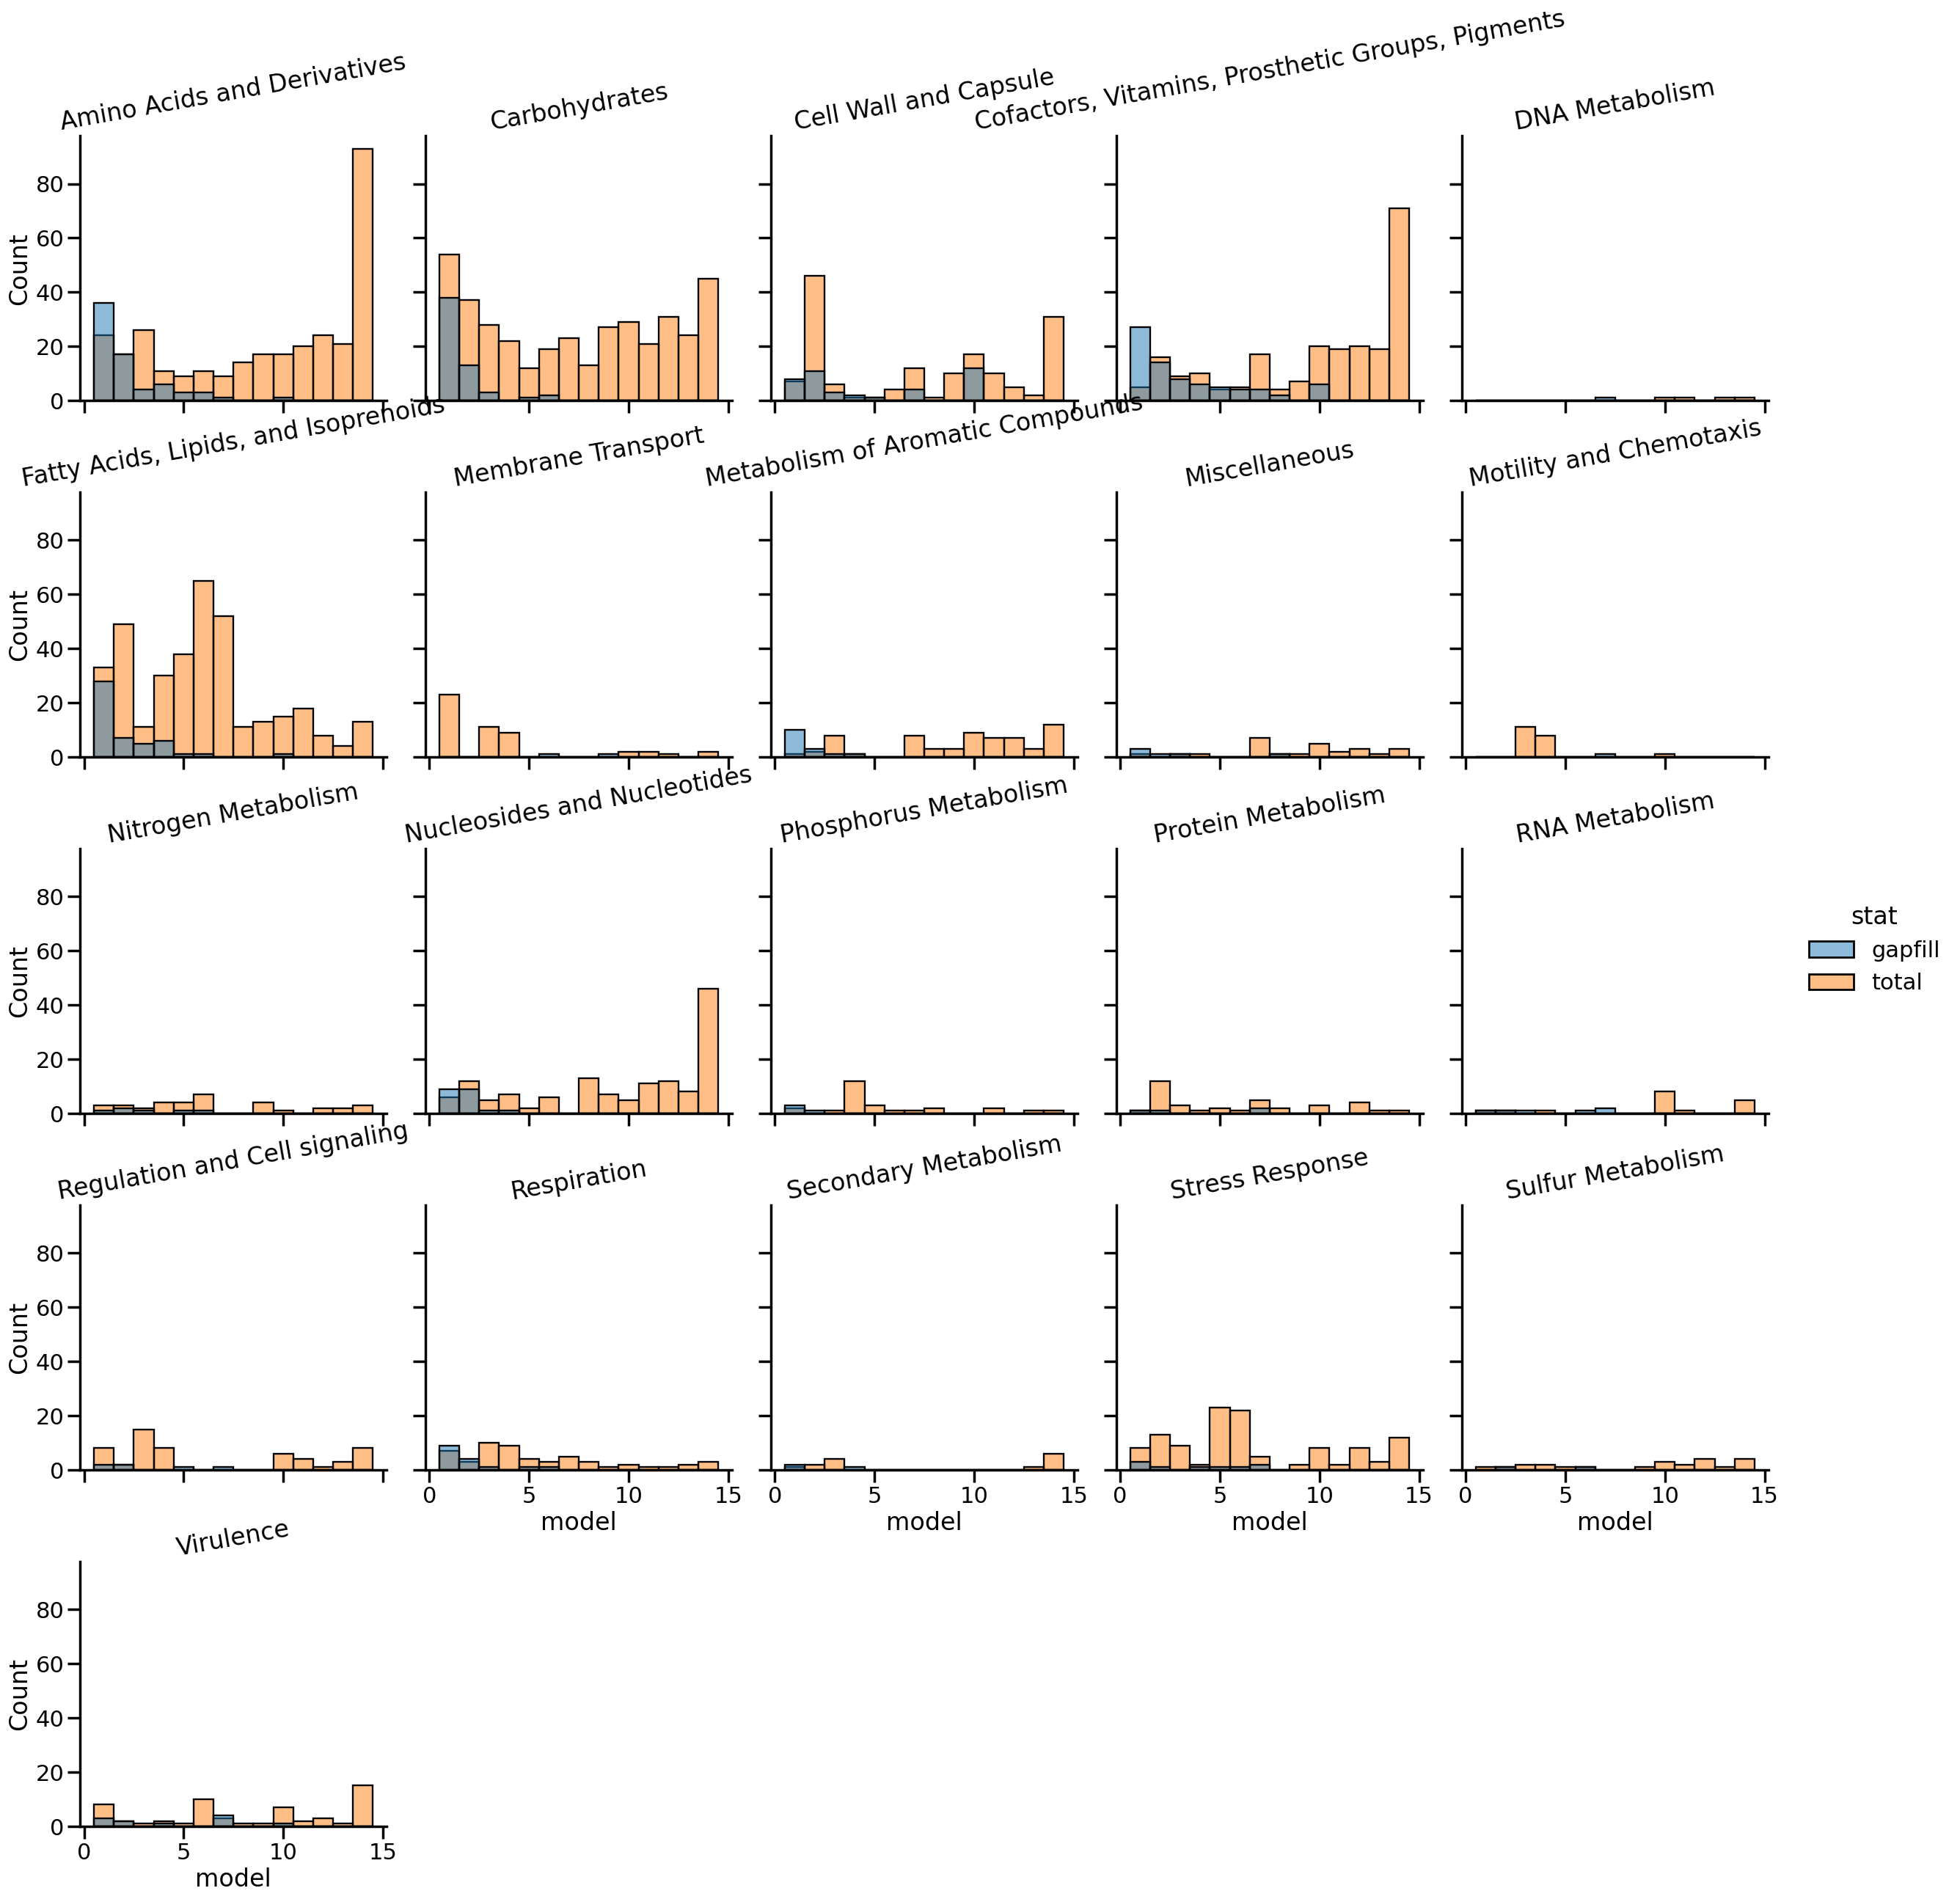

In [45]:
sns.set_context('poster')
sns.displot(data=total_models_per_reaction, x='model', 
            #fill=False, cumulative=True,
            kind='hist', col='Class', col_wrap=5, hue='stat', discrete=True,
            hue_order= ['gapfill', 'total', ],
           ).set_titles(col_template='{col_name}', rotation=10)
plt.show()

In [46]:
total_models_per_reaction

,index,Class,Reaction,model,stat
0,0,Amino Acids and Derivatives,rxn00011,13,total
1,1,Amino Acids and Derivatives,rxn00085,14,total
2,2,Amino Acids and Derivatives,rxn00114,1,total
3,3,Amino Acids and Derivatives,rxn00126,14,total
4,4,Amino Acids and Derivatives,rxn00141,14,total
...,...,...,...,...,...
2576,401,Virulence,rxn10199,7,gapfill
2577,402,Virulence,rxn10481,1,gapfill
2578,403,Virulence,rxn13782,7,gapfill
2579,404,Virulence,rxn13783,7,gapfill


# phenotype date

In [47]:
phen_df['model'].unique()

array(['2_OrMore', '2OrMore_initial_phenotype', '5_OrMore', '6_OrMore',
       'carveme', 'BioCYC', 'Majority', 'NCBI_EC', 'Prokka', 'RASTtk',
       '1_OrMore'], dtype=object)

In [48]:
phen_df.columns

Index(['Growth condition', 'Gene KO', 'Media WS', 'Addtional compounds',
       'Addtl compound bounds', 'Custom reaction bounds',
       'Observed normal growth', 'Simulated growth',
       'Simulated growth fraction', 'Gapfilled reaction count',
       'Gapfilled reactions', 'Prediction class', 'model', 'fname'],
      dtype='object')

In [49]:
morder1 = ['BioCYC',
 #'DRAM',
 #'KEGG',
 'carveme',
 'NCBI_EC',
 'Prokka',
 'RASTtk',
 'Majority',
 '1_OrMore',
 '2_OrMore',
#'2OrMore_initial_phenotype',
 #'3_OrMore',
 #'4_OrMore',
 '5_OrMore',
 '6_OrMore']

phen_pdf = phen_df.pivot_table(index=['Growth condition', 'Observed normal growth'], columns='model', 
                    #values='Simulated growth',
                    values='Simulated growth fraction',
                   
                   ).sort_index(level=1)[morder1]

# Index(['Growth condition', 'Gene KO', 'Media WS', 'Addtional compounds',
#        'Addtl compound bounds', 'Custom reaction bounds',
#        'Observed normal growth', 'Simulated growth',
#        'Simulated growth fraction', 'Gapfilled reaction count',
#        'Gapfilled reactions', 'Prediction class', 'model'],
#       dtype='object')

In [50]:
phen_pdf.sort_index(level=1)

,model,BioCYC,carveme,NCBI_EC,Prokka,RASTtk,Majority,1_OrMore,2_OrMore,5_OrMore,6_OrMore
Growth condition,Observed normal growth,,,,,,,,,,
HMB_neg_media,0,1,0,0,0,1,0,0,0,0,0
MMB_neg_media,0,1,1,0,0,1,0,0,0,0,0
PRO99_media,0,1,0,0,0,1,0,0,0,0,0
HMBaa_media,1,1,1,1,1,1,1,1,1,1,1
HMBamisug_media,1,1,1,0,0,1,0,0,0,0,0
HMBoligo_media,1,1,1,0,0,1,0,0,0,0,0
MMB_aa_media,1,1,1,1,1,1,1,1,1,1,1
MMB_pyruvate_media,1,1,1,1,1,1,1,1,1,1,1
PROMM_acetate_media,1,1,0,0,0,1,0,0,0,0,0


In [51]:
Observed = phen_pdf.index.get_level_values(1)
phen_pdf.index = phen_pdf.index.droplevel(1)
phen_pdf

model,BioCYC,carveme,NCBI_EC,Prokka,RASTtk,Majority,1_OrMore,2_OrMore,5_OrMore,6_OrMore
Growth condition,,,,,,,,,,
HMB_neg_media,1,0,0,0,1,0,0,0,0,0
MMB_neg_media,1,1,0,0,1,0,0,0,0,0
PRO99_media,1,0,0,0,1,0,0,0,0,0
HMBaa_media,1,1,1,1,1,1,1,1,1,1
HMBamisug_media,1,1,0,0,1,0,0,0,0,0
HMBoligo_media,1,1,0,0,1,0,0,0,0,0
MMB_aa_media,1,1,1,1,1,1,1,1,1,1
MMB_pyruvate_media,1,1,1,1,1,1,1,1,1,1
PROMM_acetate_media,1,0,0,0,1,0,0,0,0,0


In [52]:
sns.set_context('talk')
lut = dict(zip([0,1], "rb"))
#rcolors = phen_df.drop_duplicates('Growth condition')['Growth condition', 'Gene KO', 'Media WS', 'Addtional compounds',
#        'Addtl compound bounds', 'Custom reaction bounds',
#        'Observed normal growth',]
row_colors = Observed.map(lut)
#sns.clustermap(iris, row_colors=row_colors, lw=1)
sns.clustermap(phen_pdf, lw=0.1, row_colors=row_colors, row_cluster=False, col_cluster=False)

In [53]:
phen_df['Growth condition'].unique()

array(['PROMM_glycerol_media', 'PROMM_lactate_media',
       'PROMM_acetate_media', 'PROMM_pyruvate_media', 'PROMM_media',
       'PRO99_media', 'HMB_neg_media', 'HMBaa_media', 'HMBamisug_media',
       'HMBoligo_media', 'MMB_neg_media', 'MMB_pyruvate_media',
       'MMB_aa_media'], dtype=object)

In [55]:
phen_pdf[morder1]

model,BioCYC,carveme,NCBI_EC,Prokka,RASTtk,Majority,1_OrMore,2_OrMore,5_OrMore,6_OrMore
Growth condition,,,,,,,,,,
HMB_neg_media,1,0,0,0,1,0,0,0,0,0
MMB_neg_media,1,1,0,0,1,0,0,0,0,0
PRO99_media,1,0,0,0,1,0,0,0,0,0
HMBaa_media,1,1,1,1,1,1,1,1,1,1
HMBamisug_media,1,1,0,0,1,0,0,0,0,0
HMBoligo_media,1,1,0,0,1,0,0,0,0,0
MMB_aa_media,1,1,1,1,1,1,1,1,1,1
MMB_pyruvate_media,1,1,1,1,1,1,1,1,1,1
PROMM_acetate_media,1,0,0,0,1,0,0,0,0,0


In [56]:
morder

['BioCYC',
 'DRAM',
 'KEGG',
 'carveme',
 'NCBI_EC',
 'Prokka',
 'RASTtk',
 'Majority',
 '1_OrMore',
 '2_OrMore',
 '3_OrMore',
 '4_OrMore',
 '5_OrMore',
 '6_OrMore']

# scoring of the models

In [57]:
df

,Unnamed: 0,id,name,model,status,hasgpr,exchange,gapfilled,gpr_nogap,gpr_gapfill,Reaction,status_int
0,0,EX_cpd02701_b,EX_cpd02701_b,KEGG,exchange,False,True,False,NaN,NaN,EX_cpd02701,3
1,1,EX_cpd11416_b,EX_cpd11416_b,KEGG,exchange,False,True,False,NaN,NaN,EX_cpd11416,3
2,2,EX_cpd00001_b,EX_cpd00001_b,KEGG,exchange,False,True,False,NaN,NaN,EX_cpd00001,3
3,3,EX_cpd00254_b,EX_cpd00254_b,KEGG,exchange,False,True,False,NaN,NaN,EX_cpd00254,3
4,4,EX_cpd10516_b,EX_cpd10516_b,KEGG,exchange,False,True,False,NaN,NaN,EX_cpd10516,3
...,...,...,...,...,...,...,...,...,...,...,...,...
18995,18995,rxn02810_c0,E_Glutaconate_CoA_transferase_c0,1_OrMore,gapfill,NaN,False,True,NaN,Unknown,rxn02810,1
18996,18996,EX_cpd00063_e0,EX_Ca2_plus__e0,1_OrMore,gapfill,NaN,False,True,NaN,NaN,EX_cpd00063,1
18997,18997,EX_cpd00205_e0,EX_K_plus__e0,1_OrMore,gapfill,NaN,False,True,NaN,NaN,EX_cpd00205,1
18998,18998,EX_cpd10515_e0,EX_Fe2_plus__e0,1_OrMore,gapfill,NaN,False,True,NaN,NaN,EX_cpd10515,1


In [58]:
df.columns

Index(['Unnamed: 0', 'id', 'name', 'model', 'status', 'hasgpr', 'exchange',
       'gapfilled', 'gpr_nogap', 'gpr_gapfill', 'Reaction', 'status_int'],
      dtype='object')

In [59]:
# gapfilled is false - reaction in a model
# min(gapfilled) == False -> reaction is in a model
# min(gapfilled) == True -> reaction is not in any model

df['not_reaction_in_any_model'] = df['gapfilled'].groupby(df['id']).transform('min')

In [60]:
df['gapfilled_not_in_any_model'] = df['gapfilled'] & df['not_reaction_in_any_model']

In [61]:
df.pivot_table(index='model', columns=['gapfilled'], margins=True, aggfunc='count', values='id', fill_value=0).reset_index()

gapfilled,model,False,True,All
0,1_OrMore,2726,44,2770
1,2_OrMore,1610,87,1697
2,3_OrMore,1156,0,1156
3,4_OrMore,827,0,827
4,5_OrMore,589,178,767
5,6_OrMore,367,265,632
6,BioCYC,678,169,847
7,DRAM,1115,0,1115
8,KEGG,1145,0,1145
9,Majority,1622,79,1701


In [62]:
number_of_gapfilled_df = df.groupby('model').agg({
    'gapfilled' : 'sum', 
    #'gapfilled_not_in_any_model': 'sum', 
    'id': 'count',  
}).rename(columns={'id': 'total'}).reset_index()

In [63]:
number_of_gapfilled_df['%gapfilled'] = number_of_gapfilled_df.gapfilled / number_of_gapfilled_df.total


In [67]:
morder1

['BioCYC',
 'carveme',
 'NCBI_EC',
 'Prokka',
 'RASTtk',
 'Majority',
 '1_OrMore',
 '2_OrMore',
 '5_OrMore',
 '6_OrMore']

In [69]:
number_of_gapfilled_df

,model,gapfilled,total,%gapfilled
0,1_OrMore,44,2770,0.015884
1,2_OrMore,87,1697,0.051267
2,3_OrMore,0,1156,0.000000
3,4_OrMore,0,827,0.000000
4,5_OrMore,178,767,0.232073
5,6_OrMore,265,632,0.419304
6,BioCYC,169,847,0.199528
7,DRAM,0,1115,0.000000
8,KEGG,0,1145,0.000000
9,Majority,79,1701,0.046443


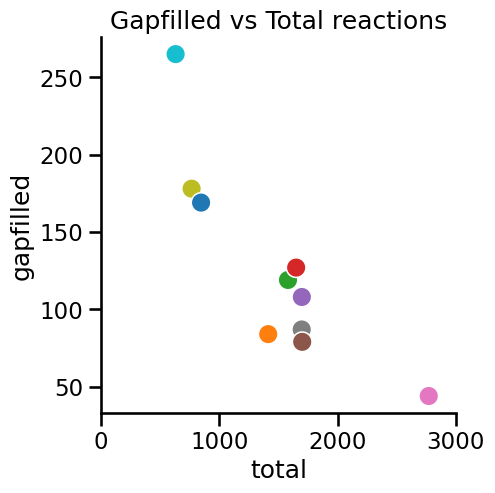

In [73]:
sns.relplot(
    data=number_of_gapfilled_df.loc[number_of_gapfilled_df.model.isin(morder1)], 
    x='total', y='gapfilled', s=200,
    hue='model', hue_order=morder1, legend=False
               ).set(xlim=(0,3000))
plt.title('Gapfilled vs Total reactions')
plt.show()

In [77]:
phen_counts_df = phen_df.pivot_table(index='model', columns='Prediction class', values='Simulated growth', aggfunc='count', fill_value=0).reset_index()

In [78]:
phen_counts_df.columns

Index(['model', 'CN', 'CP', 'FN', 'FP'], dtype='object', name='Prediction class')

In [79]:
from sklearn.metrics import f1_score

In [80]:
phen_df.head()

,Growth condition,Gene KO,Media WS,Addtional compounds,Addtl compound bounds,Custom reaction bounds,Observed normal growth,Simulated growth,Simulated growth fraction,Gapfilled reaction count,Gapfilled reactions,Prediction class,model,fname
0,PROMM_glycerol_media,none,osnat_weissberg:narrative_1685348220740,none,NaN,NaN,1,0.00000,0,0,NaN,FN,2_OrMore,HOT1A3_2OrMore_gapfill.model_initial_phenotype...
1,PROMM_lactate_media,none,osnat_weissberg:narrative_1685348220740,none,NaN,NaN,1,0.00000,0,0,NaN,FN,2_OrMore,HOT1A3_2OrMore_gapfill.model_initial_phenotype...
2,PROMM_acetate_media,none,osnat_weissberg:narrative_1685348220740,none,NaN,NaN,1,0.00000,0,0,NaN,FN,2_OrMore,HOT1A3_2OrMore_gapfill.model_initial_phenotype...
3,PROMM_pyruvate_media,none,osnat_weissberg:narrative_1685348220740,none,NaN,NaN,1,3.29214,1,0,NaN,CP,2_OrMore,HOT1A3_2OrMore_gapfill.model_initial_phenotype...
4,PROMM_media,none,osnat_weissberg:narrative_1685348220740,none,NaN,NaN,1,3.29214,1,0,NaN,CP,2_OrMore,HOT1A3_2OrMore_gapfill.model_initial_phenotype...


In [81]:
phen_df.loc[phen_df.model.isna()]

,Growth condition,Gene KO,Media WS,Addtional compounds,Addtl compound bounds,Custom reaction bounds,Observed normal growth,Simulated growth,Simulated growth fraction,Gapfilled reaction count,Gapfilled reactions,Prediction class,model,fname


In [82]:
models_f1_map = {m : 
f1_score(
    phen_df.loc[phen_df.model.isin([m]), 'Observed normal growth'], 
    phen_df.loc[phen_df.model.isin([m]), 'Simulated growth fraction'], 
) for m in phen_df.model.unique()}

In [86]:
from sklearn.metrics import balanced_accuracy_score
models_balanced_accuracy_map = {m : 
balanced_accuracy_score(
    phen_df.loc[phen_df.model.isin([m]), 'Observed normal growth'], 
    phen_df.loc[phen_df.model.isin([m]), 'Simulated growth fraction'], 
) for m in phen_df.model.unique()}

In [83]:
phen_counts_df['Correct'] = phen_counts_df['CN'] + phen_counts_df['CP']
phen_counts_df['Incorrect'] = phen_counts_df['FN'] + phen_counts_df['FP']
phen_counts_df['Total'] = phen_counts_df['Correct'] + phen_counts_df['Incorrect']
phen_counts_df['Accuracy'] = phen_counts_df['Correct'] / phen_counts_df['Total']



In [87]:
phen_counts_df['F1_score'] = phen_counts_df['model'].map(models_f1_map)
phen_counts_df['balanced_accuracy'] = phen_counts_df['model'].map(models_balanced_accuracy_map)


In [88]:
models_f1_map

{'2_OrMore': 0.6666666666666666,
 '2OrMore_initial_phenotype': 0.30769230769230765,
 '5_OrMore': 0.6666666666666666,
 '6_OrMore': 0.6666666666666666,
 'carveme': 0.7777777777777777,
 'BioCYC': 0.8695652173913044,
 'Majority': 0.8235294117647058,
 'NCBI_EC': 0.6666666666666666,
 'Prokka': 0.6666666666666666,
 'RASTtk': 0.8695652173913044,
 '1_OrMore': 0.8235294117647058}

NameError: name '__version__' is not defined

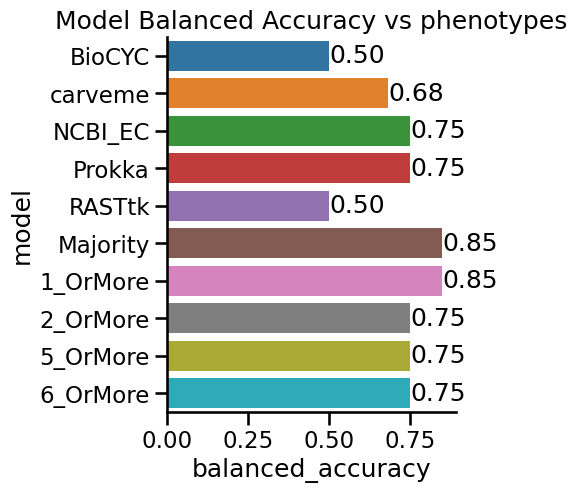

In [97]:
g = sns.catplot(
    data=phen_counts_df, 
    y='model', x='balanced_accuracy', 
    hue='model', hue_order=morder1, order=morder1,
    kind='bar', dodge=False, legend=False,
               )
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]
for c in ax.containers:
    ax.bar_label(c, labels=[f'{x:,.2f}' for x in c.datavalues]) #'%.2f')
plt.title('Model Balanced Accuracy vs phenotypes')
plt.show()

# Gap filled reactions

In [100]:
df

,Unnamed: 0,id,name,model,status,hasgpr,exchange,gapfilled,gpr_nogap,gpr_gapfill,Reaction,status_int,not_reaction_in_any_model,gapfilled_not_in_any_model
0,0,EX_cpd02701_b,EX_cpd02701_b,KEGG,exchange,False,True,False,NaN,NaN,EX_cpd02701,3,False,False
1,1,EX_cpd11416_b,EX_cpd11416_b,KEGG,exchange,False,True,False,NaN,NaN,EX_cpd11416,3,False,False
2,2,EX_cpd00001_b,EX_cpd00001_b,KEGG,exchange,False,True,False,NaN,NaN,EX_cpd00001,3,False,False
3,3,EX_cpd00254_b,EX_cpd00254_b,KEGG,exchange,False,True,False,NaN,NaN,EX_cpd00254,3,False,False
4,4,EX_cpd10516_b,EX_cpd10516_b,KEGG,exchange,False,True,False,NaN,NaN,EX_cpd10516,3,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,18995,rxn02810_c0,E_Glutaconate_CoA_transferase_c0,1_OrMore,gapfill,NaN,False,True,NaN,Unknown,rxn02810,1,True,True
18996,18996,EX_cpd00063_e0,EX_Ca2_plus__e0,1_OrMore,gapfill,NaN,False,True,NaN,NaN,EX_cpd00063,1,False,False
18997,18997,EX_cpd00205_e0,EX_K_plus__e0,1_OrMore,gapfill,NaN,False,True,NaN,NaN,EX_cpd00205,1,False,False
18998,18998,EX_cpd10515_e0,EX_Fe2_plus__e0,1_OrMore,gapfill,NaN,False,True,NaN,NaN,EX_cpd10515,1,False,False


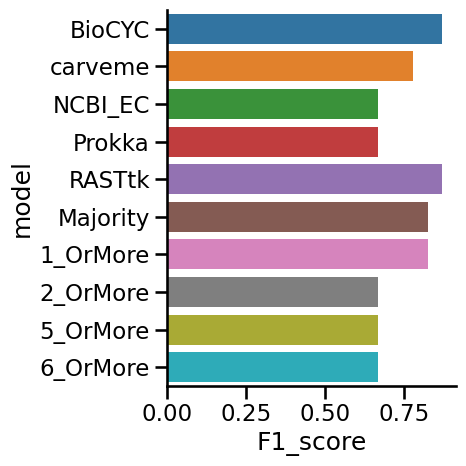

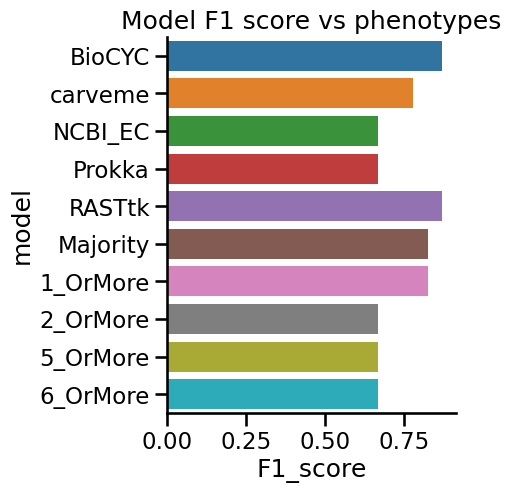

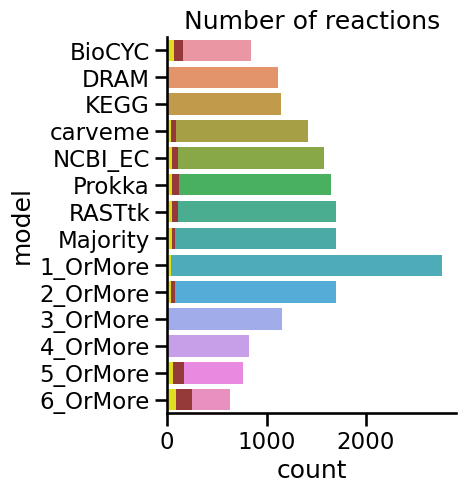

In [101]:
sns.catplot(data=df, y='model', kind='count', order=morder)
sns.countplot(data=df.loc[df.status.isin(['gapfill']) ], y='model',  order=morder, color='brown', label='gapfill')
sns.countplot(data=df.loc[df.status.isin(['gapfill']) & df.gapfilled_not_in_any_model], y='model',  order=morder, color='yellow', label='gapfill')

#plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.title('Number of reactions')
plt.show()

In [102]:
df.loc[df.status.isin(['gapfill']) & df.gapfilled_not_in_any_model, 'status'] = 'gapfill_unique' 

In [103]:
status_map = {'exchange' :3, 'hasgpr' : 3, 'nogpr' : 3, 'exchange_gapfill' : 2, 'gapfill': 2, 'gapfill_unique' :1}
#status_map = {'hasgpr' : 3, 'nogpr' : 2, 'gapfill': 1}
#status_map = {'hasgpr' : 3, 'nogpr' : 3, 'gapfill': 1}
df['status_int'] = df.status.map(status_map)
pdf = df.pivot_table(index='Reaction', columns='model', values='status_int', fill_value=-10)
pdf = pdf[morder]

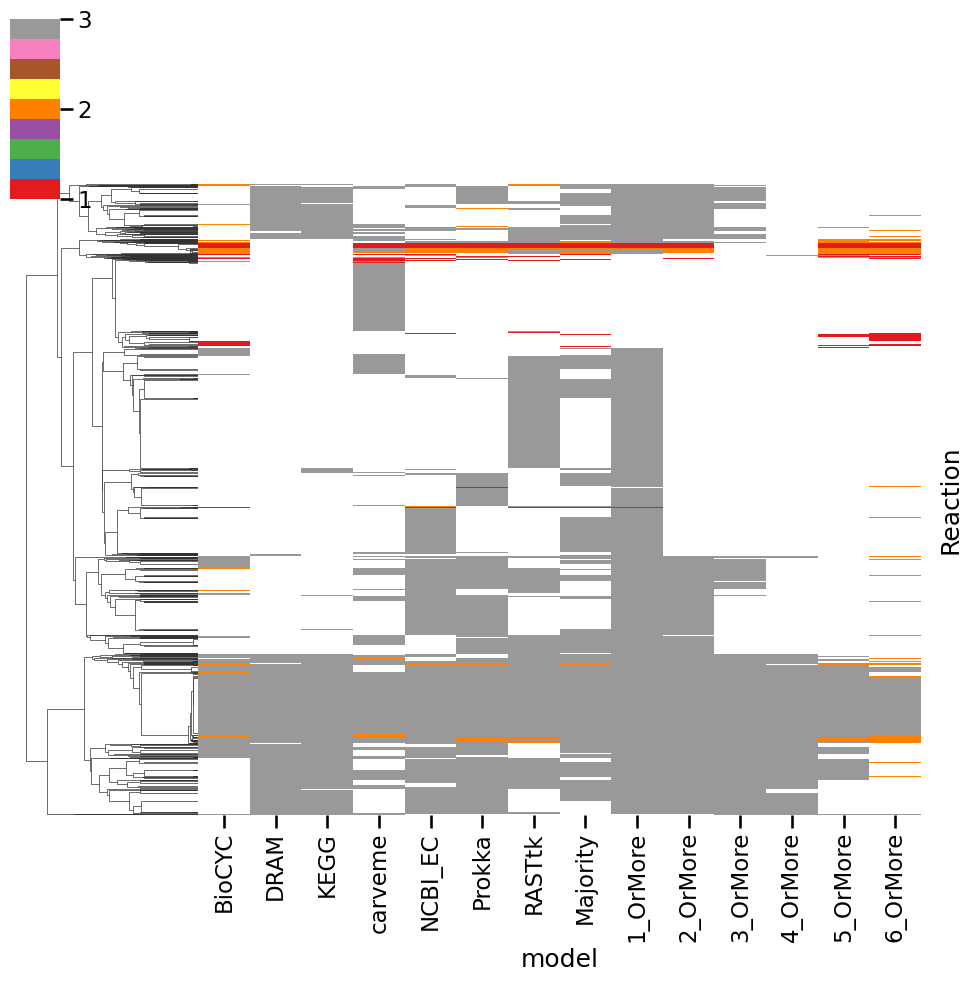

In [104]:

#lut = dict(zip(class_df.Class.unique(), "rbg"))
#samples = np.repeat(list(string.ascii_letters[0:8]),20)[:150]
#sample_cols = dict(zip(set(samples), sns.color_palette("cubehelix", 8)))

# row_colors = pd.DataFrame({'species':species.map(lut),
#                           'sample':[sample_cols[i] for i in samples]})
# g = sns.clustermap(iris, row_colors=row_colors,row_cluster=False)

#cb = g.ax_cbar
label = status_map.values()
colors = status_map.keys()
loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)

#kws = dict(cbar_kws=dict(label='', ticks=loc, #orientation='horizontal', 
                         #yticklabels=colors)
#                        ))
#sns.clustermap(corr, cmap="Blues", xticklabels=False, yticklabels=False, **kws)

g = sns.clustermap(pdf, cmap='Set1', mask=(pdf == -10), yticklabels=False,col_cluster=False, #**kws
               #cbar_pos=None 
              )

plt.show()

In [105]:
status_map

{'exchange': 3,
 'hasgpr': 3,
 'nogpr': 3,
 'exchange_gapfill': 2,
 'gapfill': 2,
 'gapfill_unique': 1}

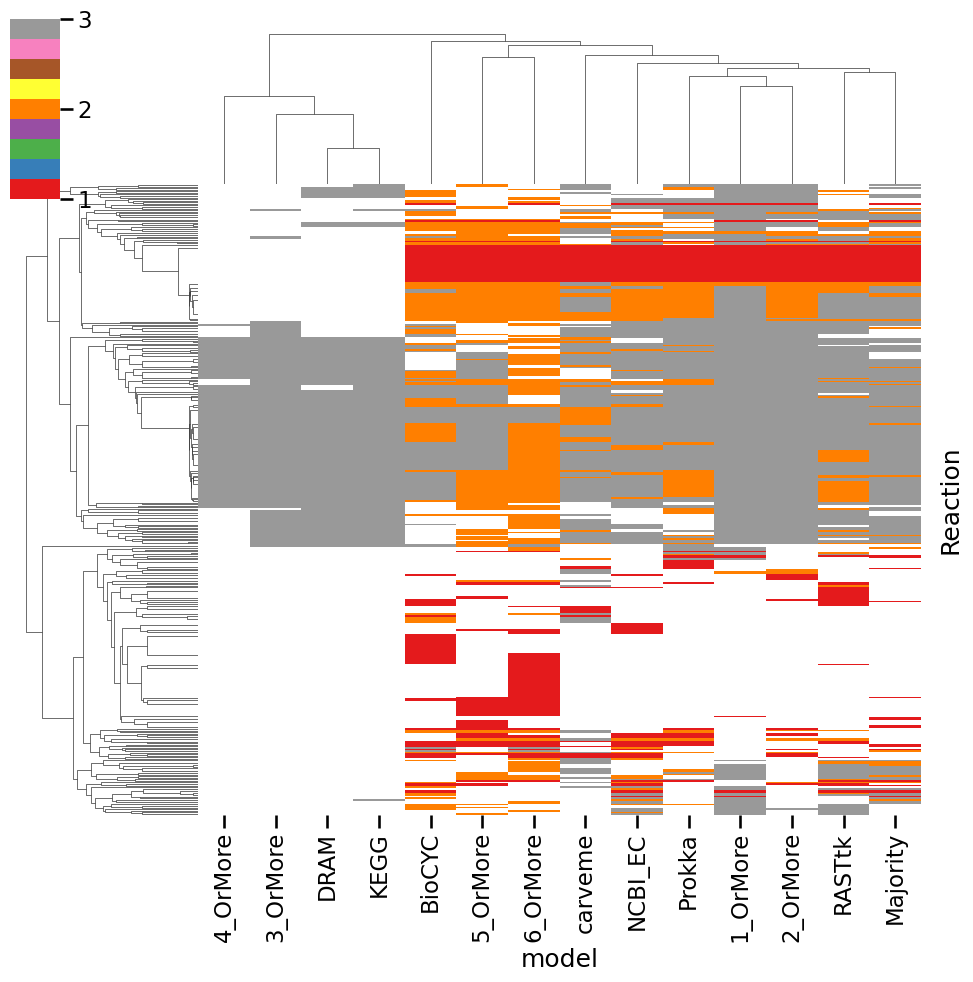

In [106]:
pdf_gap = pdf[pdf.isin([status_map['gapfill'], status_map['gapfill_unique'], ]).any(axis=1)]        
sns.clustermap(pdf_gap, cmap='Set1', mask=(pdf_gap == -10), yticklabels=False,#col_cluster=False, 
               #cbar_pos=None, lw=0.1 )
              )
plt.show()

In [107]:
pdf[pdf.isin([status_map['gapfill'], status_map['gapfill_unique'], ]).any(axis=1)]        


model,BioCYC,DRAM,KEGG,carveme,NCBI_EC,Prokka,RASTtk,Majority,1_OrMore,2_OrMore,3_OrMore,4_OrMore,5_OrMore,6_OrMore
Reaction,,,,,,,,,,,,,,
EX_cpd00009,3,-10,-10,3,3,3,3,3,3,3,3,-10,2.0,2.0
EX_cpd00013,2,-10,-10,3,2,2,3,3,3,2,-10,-10,2.0,2.0
EX_cpd00020,-10,-10,-10,3,2,2,-10,2,2,2,-10,-10,2.0,2.0
EX_cpd00030,2,-10,-10,3,2,2,3,3,3,2,-10,-10,2.0,2.0
EX_cpd00034,3,-10,-10,3,2,2,2,3,3,2,-10,-10,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rxn16622,1,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10.0,-10.0
rxn21859,-10,-10,-10,-10,-10,1,-10,-10,-10,-10,-10,-10,-10.0,-10.0
rxn21863,-10,-10,-10,-10,-10,1,-10,-10,-10,-10,-10,-10,-10.0,-10.0


In [108]:
morder_min = [
    #'BioCYC',
 'DRAM',
 'KEGG',
 #'carveme',
 'NCBI_EC',
 'Prokka',
 'RASTtk',
 'Majority',
 '1_OrMore',
 '2_OrMore',
 '3_OrMore',
 '4_OrMore',
 #'5_OrMore',
 #'6_OrMore'
]

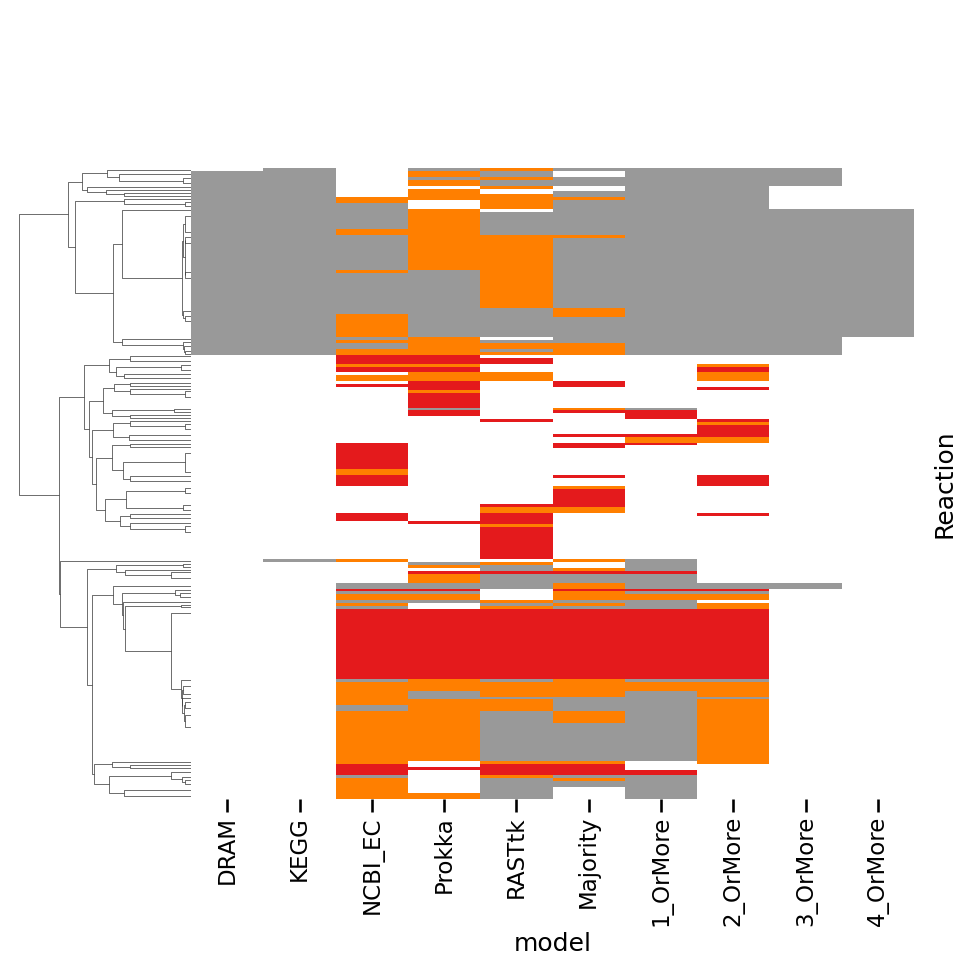

In [109]:
pdf_gap = pdf[ morder_min]
pdf_gap = pdf_gap[pdf_gap.isin([status_map['gapfill'], status_map['gapfill_unique'], ]).any(axis=1)]        
#pdf_gap = pdf_gap[ morder_min]
sns.clustermap(pdf_gap, cmap='Set1', mask=(pdf_gap == -10), yticklabels=False,col_cluster=False, 
               cbar_pos=None,  )
              
plt.show()